# Project: TMDb Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Data Cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Limitations">Limitations</a></li>
<li><a href="#References">References</a></li>  
</ul>

<a id='intro'></a>
## Introduction

<font size="3">The dataset is called TMDB movie data, it comes from IMDB. It contains information about 10,000 movies and their rating and basic information including budget, revenue and runtime data.

In this project, i'll be answering the following questions:

- What are the most used genres from 1960 to 2015?
- Who are the top 10 Directors with the most Films?
- Who are the top 10 cast with the most Films?
- what is the total profit for each year?
- which movie has the highest profit?
- what is the total budget for each year?
- which movie has the highest budget?
- What month that has the highest revenue?
- What are top 10 popular taglines from movies?
- How does the votes affect the popularity of a movie?</font>


In [64]:
# Import statements for all of the needed packages.

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime

% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

<font size="3.75">In this part, I will explore the General Properties of the Dataset.

</font>




### General Properties

In [65]:
# Load the data.

df_movies = pd.read_csv('tmdb-movies.csv')

df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [66]:
df_movies.shape

(10866, 21)

> <font size="3">As we can see, there is 21 columns and 10866 rows (entries).</font>


In [67]:
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> <font size="3">From the descriptive information above, we can see that there is a lot of zero values in the **budget**, **revenue**, **budget_adj** and **revenue_adj** columns. But, there is a few in the **runtime** column.</font>

In [68]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [69]:
# To count non zero values in columns.

df_movies.astype(bool).sum(axis=0)

id                      10866
imdb_id                 10866
popularity              10866
budget                   5170
revenue                  4850
original_title          10866
cast                    10866
homepage                10866
director                10866
tagline                 10866
keywords                10866
overview                10866
runtime                 10835
genres                  10866
production_companies    10866
release_date            10866
vote_count              10866
vote_average            10866
release_year            10866
budget_adj               5170
revenue_adj              4850
dtype: int64


> <font size="3">There are a lot of zero values in **budget** and **revenue** columns. Therefore, Dropping them out would corrupt the results, it would be better if the values are set to null. Meanwhile **runtime** column dosen't contain a lot of zero values, so they can be droupped out. </font>


In [70]:
# To check null values in each column.

df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> <font size="3">There are a lot of null values in the **homepage**, **tagline**, **keywords** and **production_companies** columns, it is better to drop the columns, but will keep the **tagline** column for more exploration. However, the null values of the **cast**, **director** and **genres** columns are few, so it will be dropped out.</font>


In [71]:
# To check duplicates data.

sum(df_movies.duplicated())

1

> <font size="3">There is one duplicate row. So, it is better to drop it.</font>

In [72]:
# To chaeck the datatype of each column.

df_movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

> <font size="3">The **relase_date** column type is string, because as we know pandas uses native python strings, which require an object dtype. Therefore, data type must be changed to date time.</font>

## Data Cleaning

<font size="3">In this part, a trivial data cleaning will be performed In the order:
- Dropping Unecessary Columns
- Dropping duplicates
- Changing data types
- Deleting NaN values
- Creating new column '*profit*'
- Replacing zero values with NaN</font>

### Dropping Unecessary Columns

In [73]:
# Dropping unecessary columns

df_movies.drop(['id','imdb_id','homepage','keywords','overview','runtime','production_companies','budget_adj','revenue_adj'] ,axis=1 ,inplace=True)

# To check

df_movies.head(1)


,popularity,budget,revenue,original_title,cast,director,tagline,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


### Dropping duplicates

In [74]:
# Dropping duplicates rows

df_movies.drop_duplicates(inplace=True)

# To check

sum(df_movies.duplicated())

0

### Changing data types

In [75]:
# Changing the type of release_date column from string to datetime format

df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

# To check

df_movies.dtypes

popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

### Deleting NaN values 

In [76]:
# Deleting all NaN values in the 'cast', 'director' and 'genres' columns

df_movies.dropna(subset = ['cast', 'director', 'genres'], inplace=True)

# To check

df_movies.isnull().sum()

popularity           0
budget               0
revenue              0
original_title       0
cast                 0
director             0
tagline           2730
genres               0
release_date         0
vote_count           0
vote_average         0
release_year         0
dtype: int64

### Creating new column '*profit*'

In [77]:
# Creating new column called 'profit' for movies profit. 

df_movies['profit'] = df_movies['revenue'] - df_movies['budget']

# To check

df_movies.head(1)

,popularity,budget,revenue,original_title,cast,director,tagline,genres,release_date,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810


### Replacing zero values with NaN

In [78]:
# Replacing all the 0 values in the 'budget' and 'revenue' columns with NaN

col = ['budget', 'revenue', 'profit']
df_movies[col] = df_movies[col].replace(0, np.NAN)

# To check

df_movies.isnull().sum()

popularity           0
budget            5578
revenue           5888
original_title       0
cast                 0
director             0
tagline           2730
genres               0
release_date         0
vote_count           0
vote_average         0
release_year         0
profit            4587
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis
<font size="3.75">In this part, I will be analyzing the data and come up with a conclusion to answer the questions.</font>

In [79]:
# Creating Split_Data function, it takes a column like genres, cast or director and split the data.

def Split_Data(col):
        
    data = df_movies[col].str.cat(sep = '|')
    data = pd.Series(data.split('|'))
        
    return data

### Question: What are the most used genres from 1960 to 2015?

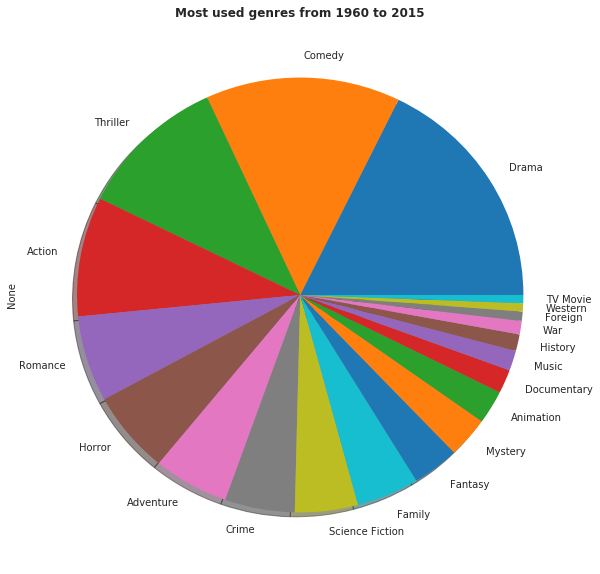

In [80]:
# Count the values of the genres column to find the most filmed genres in this time of period.

genres = Split_Data('genres').value_counts()

fig, ax = plt.subplots()

ax.set_title('Most used genres from 1960 to 2015', fontsize=12, fontweight='bold')

genres.plot(ax=ax, kind='pie', figsize=(10,10), shadow=True)


><font size="3">We can see that **Drama** is the most frequently genre, followed by **comedy**, **thriller** and **action**.</font>

### Question: Who are the top 10 Directors with the most Films?

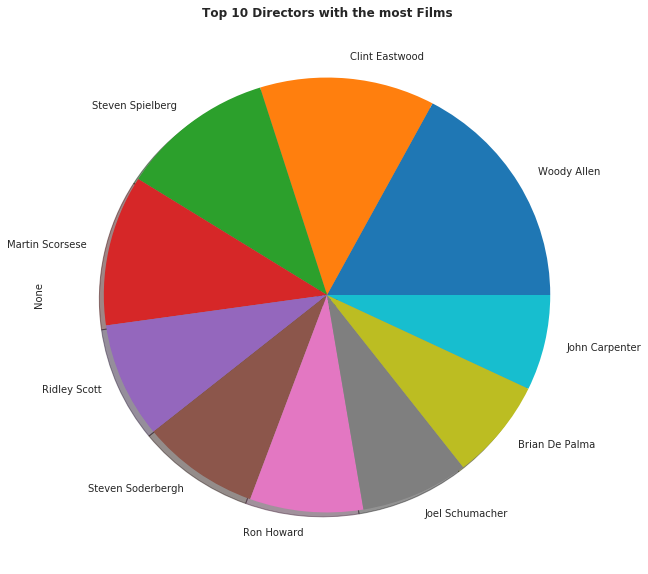

In [81]:
# Count the values of the director column to find the directors with the most Films in this time of period.

directors = Split_Data('director').value_counts()

fig, ax = plt.subplots()

ax.set_title('Top 10 Directors with the most Films', fontsize=12, fontweight='bold')

directors[:10].plot(ax=ax, kind='pie', figsize=(10,10), shadow=True)


><font size="3">It seems that **Woody Allen** surpasses other directors in number of movies made.</font>

### Question: Who are the top 10 cast with the most Films?

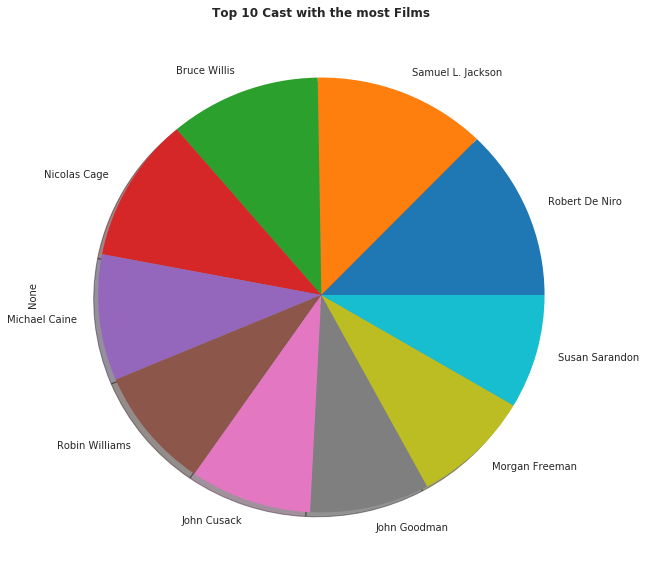

In [82]:
# Count the values of the cast column to find the cast with the most Films in this time of period.

cast = Split_Data('cast').value_counts()

fig, ax = plt.subplots()

ax.set_title('Top 10 Cast with the most Films', fontsize=12, fontweight='bold')

cast[:10].plot(ax=ax, kind='pie', figsize=(10,10), shadow=True)


><font size="3">It seems that **Robert De Niro** has filmed more movies than the other cast.</font>

### Question: What is the total profit for each year?

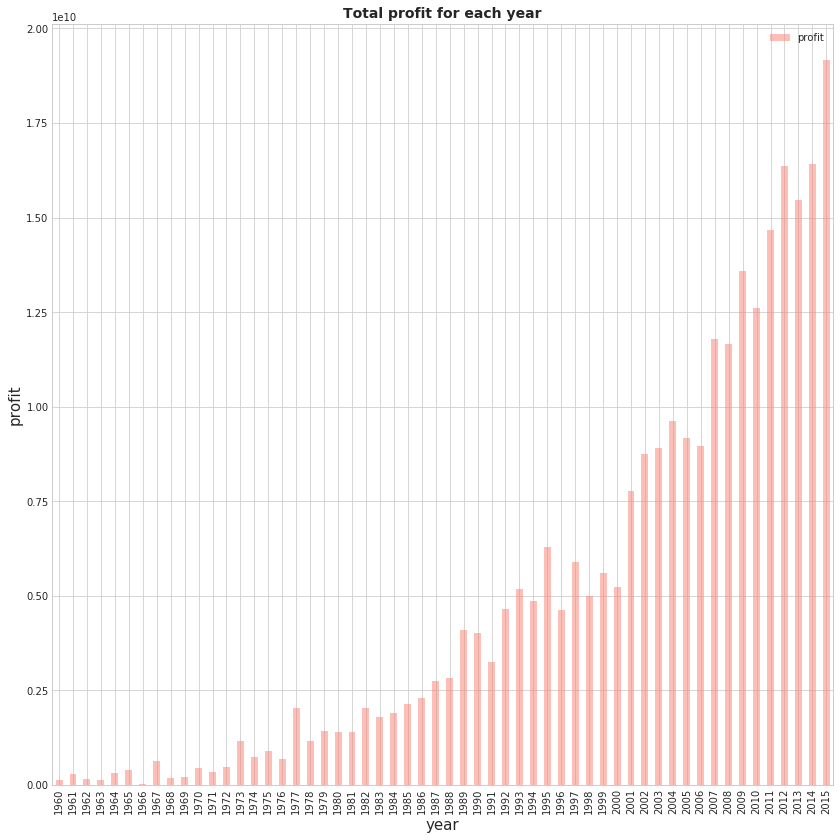

In [83]:
# Select 'release_year', 'profit' and 'original_title' columns. 
# 'release_year' and 'profit' values are sorted
# Assign to a new DataFrame years_profit

years_profit = df_movies[['release_year','profit','original_title']].sort_values(['release_year','profit'], ascending=False)

# Group by the release_year and calculate the total profit for each year.

years_profit = pd.DataFrame(years_profit.groupby(['release_year']).sum())

fig, ax = plt.subplots()

years_profit.plot(ax=ax, kind='bar', figsize=(14,14), color='salmon', alpha=0.5)

ax.set_title('Total profit for each year', fontsize=14, fontweight='bold')
ax.set_xlabel('year', fontsize=15)
ax.set_ylabel('profit', fontsize=15)

sns.set_style("whitegrid")

In [84]:
df_movies['profit'].describe()

count    6.144000e+03
mean     4.456621e+07
std      1.250469e+08
min     -4.139124e+08
25%     -4.500000e+06
50%      4.066558e+06
75%      4.461295e+07
max      2.544506e+09
Name: profit, dtype: float64

### Question: What is the movie with the highest profit?

In [85]:
Highest_profit = df_movies.loc[df_movies['profit'].idxmax()]

print('The movie with the highest profit is', df_movies['original_title'][df_movies['profit'].idxmax()])


The movie with the highest profit is Avatar


><font size="3">We can see that 2015 has highest total profit. However, The highest profit 2.544506e+09 was for the movie **Avatar** that was released in 2009.</font>

### Question: What is the total budget for each year?

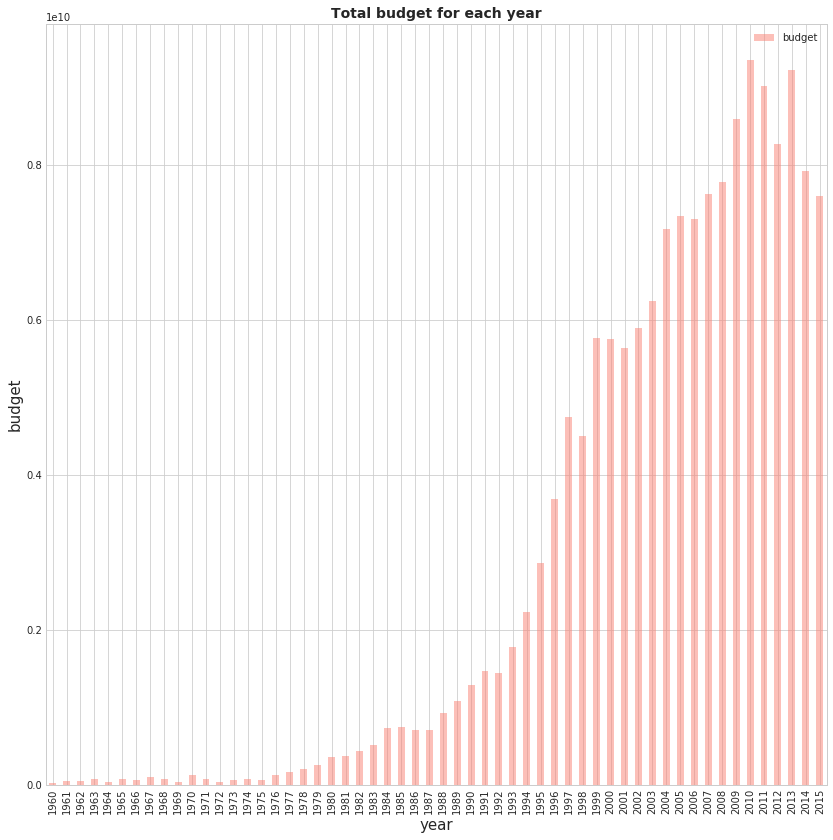

In [86]:
# Select 'release_year', 'budget' and 'original_title' columns. 
# 'release_year' and 'budget' values are sorted
# Assign to a new DataFrame years_budget

years_budget = df_movies[['release_year','budget','original_title']].sort_values(['release_year','budget'], ascending=False)

# Group by the release_year and calculate the total budget for each year.

years_budget = pd.DataFrame(years_budget.groupby(['release_year']).sum())

fig, ax = plt.subplots()

years_budget.plot(ax=ax, kind='bar', figsize=(14,14), color='salmon', alpha=0.5)

ax.set_title('Total budget for each year', fontsize=14, fontweight='bold')
ax.set_xlabel('year', fontsize=15)
ax.set_ylabel('budget', fontsize=15)

sns.set_style("whitegrid")

In [87]:
df_movies['budget'].describe()

count    5.153000e+03
mean     3.082824e+07
std      3.893199e+07
min      1.000000e+00
25%      6.000000e+06
50%      1.750000e+07
75%      4.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

### Question: What is the movie with the highest budget?

In [88]:
Highest_budget = df_movies.loc[df_movies['budget'].idxmax()]

print('The movie with the highest budget is', df_movies['original_title'][df_movies['budget'].idxmax()])


The movie with the highest budget is The Warrior's Way


><font size="3.75">We can see that 2010 has highest total budget, and the highest budget 4.250000e+08 was for the movie **The Warrior's Way** which was released also in 2010.</font>
 

### Question: What is the month with the highest revenue?

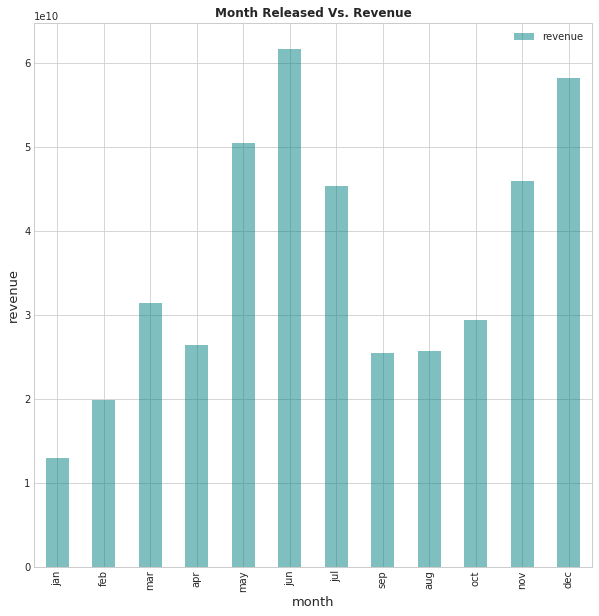

In [89]:
# Extract the month from release_date to create a new column called month.

df_movies['month'] = df_movies['release_date'].dt.month

month_revenues = pd.DataFrame({'month':['jan','feb','mar','apr','may','jun','jul','sep','aug','oct','nov','dec'],
                   'revenue':df_movies.groupby('month')['revenue'].sum()})

fig, ax = plt.subplots()

ax.set_title('Month Released Vs. Revenue', fontsize=12, fontweight='bold')
ax.set_xlabel('month', fontsize=13)
ax.set_ylabel('revenue', fontsize=13)

month_revenues.plot(ax=ax, x='month', y='revenue', kind='bar', figsize=(10,10), color='teal', alpha=0.5)

sns.set_style("whitegrid")

><font size="3">**June** and **December** have the highest revenue. Hence, we can conclude that **June** and **December** are suitable months to release movies in, because they tend to bring in the highest revenue.</font>


### Question: How does the votes affect the popularity?

               votes  popularity
votes       1.000000    0.800619
popularity  0.800619    1.000000


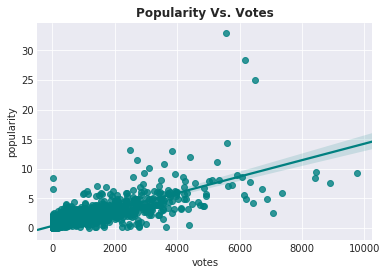

In [94]:
# Select 'vote_count' and 'popularity' columns.
# Assign to a new DataFrame df

df = pd.DataFrame({'votes':df_movies['vote_count'], 'popularity':df_movies['popularity']})

fig, ax = plt.subplots()
ax.set_title("Popularity Vs. Votes", fontsize=12, fontweight='bold')

sns.regplot(x=df['votes'], y=df['popularity'], color='teal')

print(df.corr())

sns.set_style("darkgrid")

><font size="3">**Popularity** And **vote count** both have a positive correlation between them. Means there is a good possibility movies that has a lot of vote counts will result in increasing their **popularity**.</font>



### Question: What are the top 10  popular taglines from movies?

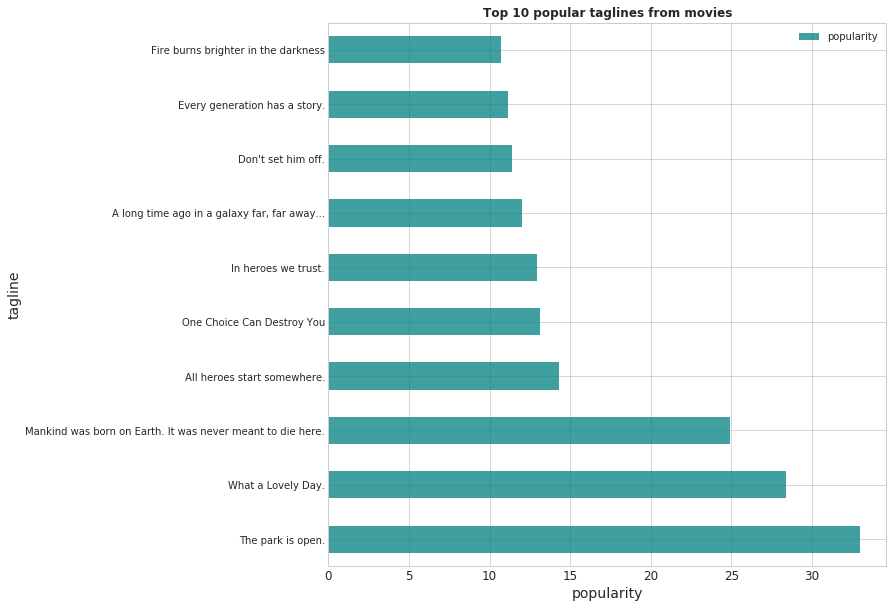

In [96]:
# Select the popular movies that has high popularity (greater or equal to the mean).
# Sort the values by popularity. 
# Assign to a new DataFrame df.

df = df_movies[df_movies['popularity']>=0.646441].sort_values(by='popularity', ascending=False)

fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=10)

df[:10].plot(ax=ax, x='tagline', y='popularity', kind='barh', figsize=(10,10), color='teal', alpha=0.75)

ax.set_title('Top 10 popular taglines from movies', fontsize=12, fontweight='bold')
ax.set_ylabel('tagline', fontsize=14)
ax.set_xlabel('popularity', fontsize=14)

sns.set_style("whitegrid")


><font size="3"> Popular taglines come from popular movies, and after sorting the movies by their popularity, we conclude that the most popular tagline is *"The Park is Open"* from the movie **Jurassic World**.</font>


<a id='conclusions'></a>
## Conclusions

> - <font size="3">**Drama** genre is common among movies followed by *Comedy*, *Thriller* and *Action*. </font>
> - <font size="3">The Director who made most of the movies from 1960 to 2015 is **Woody Allen**.</font>
> - <font size="3">The Actor who filmed most of the movies from 1960 to 2015 is **Robert De Niro**. </font>
> - <font size="3">The year with the total highest profit is **2015**, and The year with the highest total budget is **2010**.</font>
> - <font size="3">The movie with the highest profit is **Avatar**, and The movie with the highest budget is **The Warrior's Way**.</font>
> - <font size="3">The most profitable months are **June**, *December*, and *May*.</font>
> - <font size="3">There also seems to be **correlation** between a movie's *popularity* and it's *votes*. A movie having high votes seems to be popular.</font>
> - <font size="3">The most popular tagline is *"The Park is Open"* from the movie **Jurassic World**.</font>


## Limitations
> - <font size="3">There was a lot of zero values in budget and revenue columns. and because dropping them out would corrupt the results, it would be better if the values are set to null.</font>
> - <font size="3">There was a few null values in director and cast columns, and a lot in budget and revenue columns after setting the zero values to null. hence a lot of data have been lost in the process.</font>


## References

> + [seaborn](https://seaborn.pydata.org/index.html)
> + [pandas](https://pandas.pydata.org/docs/index.html)
> + [Markdown for Jupyter notebooks](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed)
> + [stackoverflow](https://stackoverflow.com)


In [97]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0